# **Financial Time Series Forecasting on Google Cloud Platform**

**Import Libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

time: 9.83 ms (started: 2021-03-11 08:03:42 +00:00)


In [29]:
!pip install --quiet ipython-autotime pandas_gbq
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.45 s (started: 2021-03-11 08:03:47 +00:00)


# **Load Data**

**[Option 1] Load Data from Google Cloud Storage**

In [ ]:
# !gsutil cp gs://lunar-demo/series.csv .

**[Option 2] Load Data from BigQuery**

In [30]:
_FINANCE_PROJECT_NAME = u"lunar-demo"

def run_finance_query(query, index_col="date"):
  return pd.read_gbq(
    query,
    project_id=_FINANCE_PROJECT_NAME,
    index_col=index_col,
    dialect="standard").sort_index()

time: 1.19 ms (started: 2021-03-11 08:03:58 +00:00)


In [31]:
# 'financial data'
stockprice_raw = run_finance_query(
    "SELECT * FROM `lunar-demo.repo.timeseries` order by date asc")

time: 1.36 s (started: 2021-03-11 08:04:05 +00:00)


In [32]:
stockprice_raw.head()

,google,apple,microsoft
date,,,
2010-02-01 00:00:00+00:00,265.51,280.42,299.63
2010-02-02 00:00:00+00:00,264.57,285.87,293.80
2010-02-03 00:00:00+00:00,269.40,279.49,297.20
2010-02-04 00:00:00+00:00,262.41,282.35,299.44
2010-02-05 00:00:00+00:00,264.65,284.06,302.08


time: 20.6 ms (started: 2021-03-11 08:04:08 +00:00)


**[Option 3] Load Data from Github**

In [33]:
url = 'https://raw.githubusercontent.com/deltorobarba/repo/master/series.csv'
series_raw = pd.read_csv(url)
series_raw.head()

,date,price1,price2,price3
0,2010-02-01,265.514771,280.416718,299.634420
1,2010-02-02,264.568329,285.866858,293.798048
2,2010-02-03,269.400208,279.490699,297.201112
3,2010-02-04,262.406433,282.354225,299.442578
4,2010-02-05,264.653015,284.056413,302.076580


time: 233 ms (started: 2021-03-11 08:04:27 +00:00)


# **Display & Analyse Data**

In [35]:
series = series_raw.set_index('date').rename(columns={"price1": "google", "price2": "apple", "price3" : "microsoft"})
series.index = pd.to_datetime(series.index, utc=False)
series.head()

,google,apple,microsoft
date,,,
2010-02-01,265.514771,280.416718,299.634420
2010-02-02,264.568329,285.866858,293.798048
2010-02-03,269.400208,279.490699,297.201112
2010-02-04,262.406433,282.354225,299.442578
2010-02-05,264.653015,284.056413,302.076580


time: 19 ms (started: 2021-03-11 08:05:16 +00:00)


In [36]:
#series = stockprice_raw 

time: 373 µs (started: 2021-03-11 08:05:29 +00:00)


<AxesSubplot:title={'center':'Stock Prices - Daily Values'}, xlabel='date'>

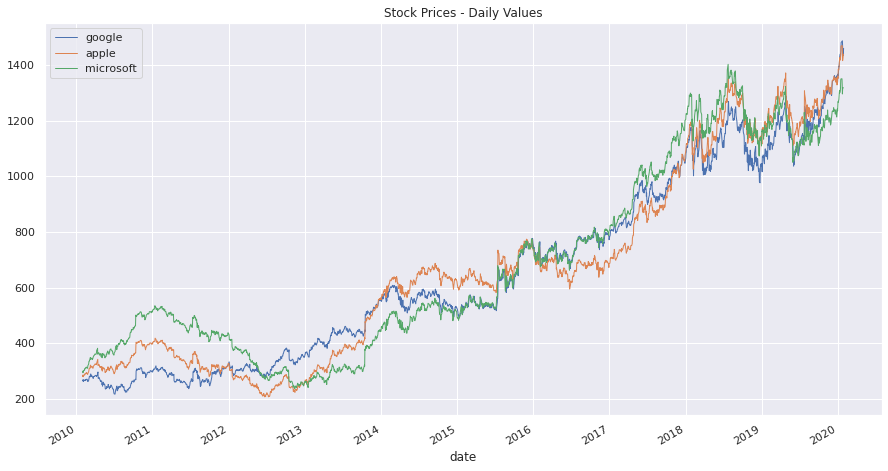

time: 417 ms (started: 2021-03-11 08:05:30 +00:00)


In [37]:
sns.set(rc={'figure.figsize':(15, 8), "lines.linewidth": 1.0})
series.plot(title='Stock Prices - Daily Values')

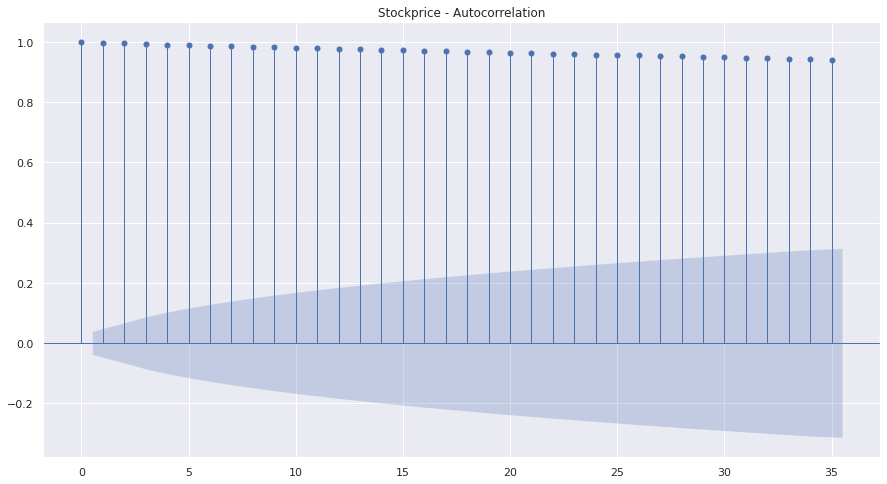

time: 322 ms (started: 2021-03-11 08:08:47 +00:00)


In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.google)
plt.title('Stockprice - Autocorrelation')
plt.show()

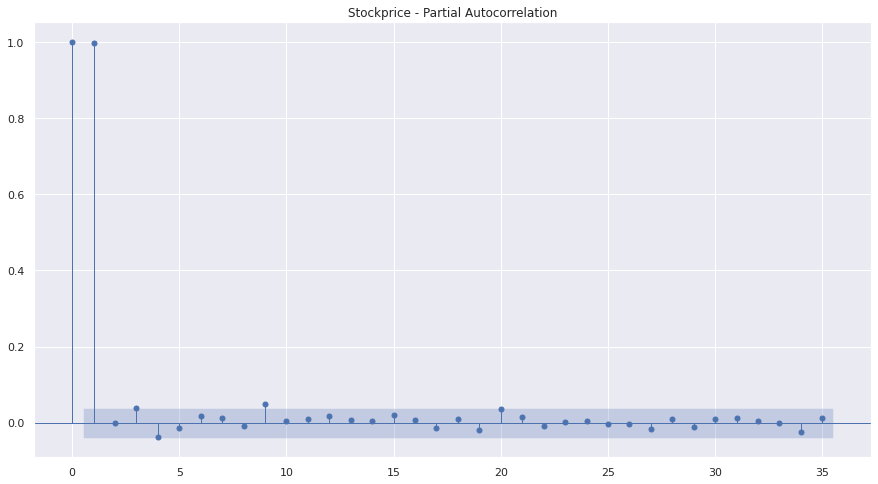

time: 274 ms (started: 2021-03-08 10:34:11 +00:00)


In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series.google)
plt.title('Stockprice - Partial Autocorrelation')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


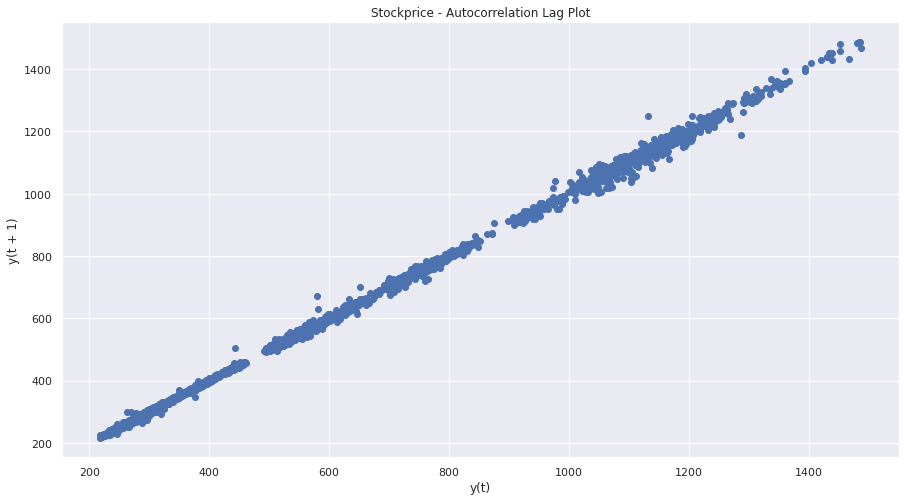

time: 225 ms (started: 2021-03-08 10:34:12 +00:00)


In [18]:
from pandas.plotting import lag_plot
lag_plot(series.google)
plt.title('Stockprice - Autocorrelation Lag Plot')
plt.show()

In [19]:
seasonal_plots = series.copy()
seasonal_plots

,google,apple,microsoft
date,,,
2010-02-01 00:00:00+00:00,265.51,280.42,299.63
2010-02-02 00:00:00+00:00,264.57,285.87,293.80
2010-02-03 00:00:00+00:00,269.40,279.49,297.20
2010-02-04 00:00:00+00:00,262.41,282.35,299.44
2010-02-05 00:00:00+00:00,264.65,284.06,302.08
...,...,...,...
2020-01-23 00:00:00+00:00,1486.65,1448.56,1295.50
2020-01-24 00:00:00+00:00,1466.71,1415.14,1313.33
2020-01-27 00:00:00+00:00,1433.90,1433.18,1318.58


time: 12.9 ms (started: 2021-03-08 10:34:13 +00:00)


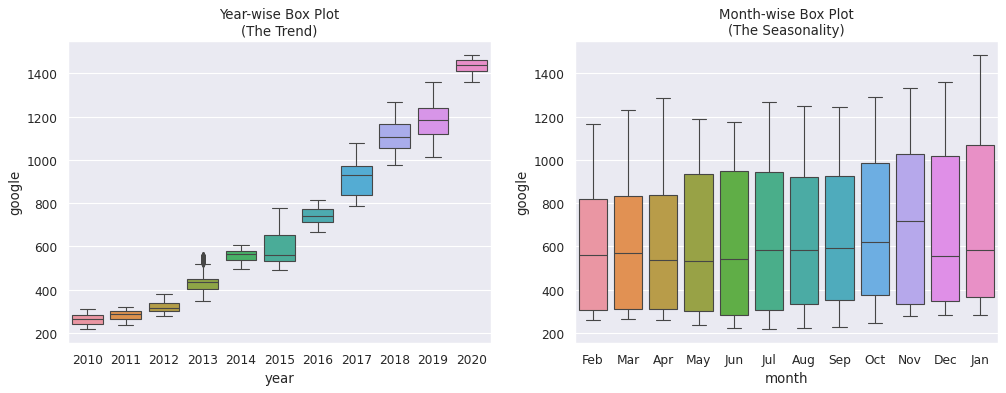

time: 1.03 s (started: 2021-03-11 08:09:00 +00:00)


In [39]:
# Trend and Seasonality Test
seasonal_plots = series.copy()
seasonal_plots = seasonal_plots.drop(columns=['microsoft', 'apple'])
seasonal_plots.reset_index(inplace=True)

# Prepare data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi= 80)
sns.boxplot(x='year', y='google', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='google', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


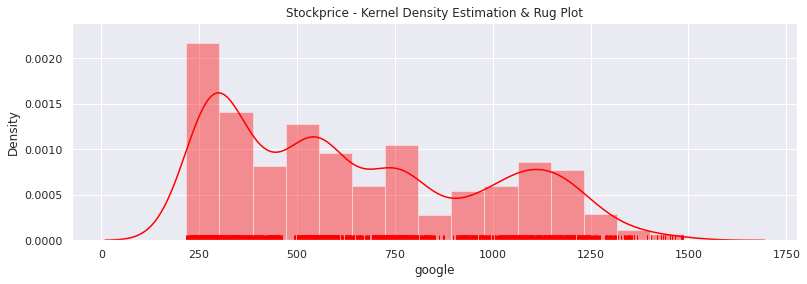

time: 385 ms (started: 2021-03-08 10:34:16 +00:00)


In [21]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series.google), hist=True, rug=True, color ='red').set_title('Stockprice - Kernel Density Estimation & Rug Plot')
plt.show()

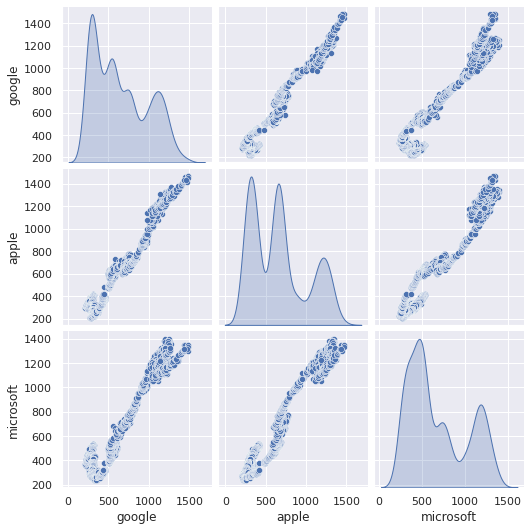

time: 1.57 s (started: 2021-03-08 10:34:18 +00:00)


In [22]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.pairplot(series, diag_kind='kde')

In [ ]:
grangercausality = series.copy()
grangercausality = grangercausality.drop(columns=['microsoft'])
grangercausality = grangercausality.diff()
grangercausality = grangercausality.dropna()
grangercausality

In [ ]:
# Granger Causality
# Null hypothesis: x2 does NOT Granger cause x1
# Reject null hypothesis if the p-values are below 0.05
import statsmodels.api as sm
import statsmodels.tsa.stattools

statsmodels.tsa.stattools.grangercausalitytests(grangercausality, maxlag = 5, addconst=True, verbose=True)

In [ ]:
sns.set(rc={'figure.figsize':(17, 8), "lines.linewidth": 1.0})
# get delta between time series
grangercausality['delta'] = (grangercausality.google) - (grangercausality.apple)
# visualize
grangercausality.delta.plot(title='Stock Prices - Daily Values')

In [ ]:
sns.set(rc={'figure.figsize':(17, 8), "lines.linewidth": 1.0})
# normalize series
grangercausality = grangercausality.apply(lambda x: x/x.cummax(), axis=0)
# visualize
grangercausality.delta.plot(title='Stock Prices - Daily Values')

**What is the time span? (until when do we have data?)**

In [13]:
series.tail()

,google,apple,microsoft
date,,,
2020-01-23,1486.650024,1448.563926,1295.499336
2020-01-24,1466.709961,1415.138255,1313.333003
2020-01-27,1433.900024,1433.183293,1318.579432
2020-01-28,1452.560059,1438.639002,NaN
2020-01-29,1458.630005,NaN,NaN


**Are there any missing data?**

In [40]:
series.apply(lambda x: sum(x.isnull()),axis=0) 

google       0
apple        1
microsoft    2
dtype: int64

time: 7.58 ms (started: 2021-03-11 08:09:10 +00:00)


**Drop NaN values**

In [41]:
series = series.dropna()
series.tail()

,google,apple,microsoft
date,,,
2020-01-21,1484.400024,1469.037495,1349.910513
2020-01-22,1485.949951,1469.120434,1329.138464
2020-01-23,1486.650024,1448.563926,1295.499336
2020-01-24,1466.709961,1415.138255,1313.333003
2020-01-27,1433.900024,1433.183293,1318.579432


time: 13.2 ms (started: 2021-03-11 08:09:12 +00:00)


**Write cleaned time series as table called 'series' to bigquery**

In [42]:
series = series.reset_index()
project_id = !gcloud config get-value project
series.to_gbq('banking.series', project_id=project_id[0])

1it [00:06,  6.15s/it]

time: 7.56 s (started: 2021-03-11 08:09:13 +00:00)


# **Regression (Forecasting) in BigQuery**

**Train BigQuery**

In [43]:
%%bigquery
CREATE MODEL `lunar-demo.banking.arima`
 OPTIONS(MODEL_TYPE='ARIMA',
         time_series_timestamp_col='date',
         time_series_data_col='google') AS
SELECT
  date,
  google
FROM
  `banking.series`

""


time: 1min 32s (started: 2021-03-11 08:10:09 +00:00)


In [44]:
%%bigquery
SELECT * 
FROM ML.ARIMA_COEFFICIENTS(MODEL banking.arima)

,ar_coefficients,ma_coefficients,intercept_or_drift
0,"[-0.3631838810303424, -0.6480094071529039, 0.1...","[0.5297251029398097, 0.9159993018852919]",0.298336


time: 2.47 s (started: 2021-03-11 08:12:23 +00:00)


In [45]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL banking.arima)

,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods
0,3,1,2,True,-11735.069371,23484.138742,36.502184,"[WEEKLY, YEARLY]"
1,3,1,2,False,-11738.278048,23488.556095,36.566449,"[WEEKLY, YEARLY]"
2,4,1,1,True,-11831.027466,23676.054931,38.481354,"[WEEKLY, YEARLY]"
3,4,1,0,True,-11852.466527,23716.933054,38.937325,"[WEEKLY, YEARLY]"
4,5,1,0,True,-11852.464640,23718.929279,38.937285,"[WEEKLY, YEARLY]"
5,4,1,0,False,-11855.930338,23721.860676,39.011350,"[WEEKLY, YEARLY]"
6,4,1,1,False,-11855.927659,23723.855317,39.011292,"[WEEKLY, YEARLY]"
7,5,1,0,False,-11855.928654,23723.857308,39.011314,"[WEEKLY, YEARLY]"
8,0,1,3,True,-11857.058855,23724.117711,39.035650,"[WEEKLY, YEARLY]"
9,3,1,1,True,-11856.182812,23724.365624,39.016856,"[WEEKLY, YEARLY]"


time: 2.33 s (started: 2021-03-11 08:12:26 +00:00)


In [46]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL banking.arima)

,training_run,iteration,duration_ms
0,0,0,81865


time: 2.14 s (started: 2021-03-11 08:12:33 +00:00)


# **Classification in BigQuery**

In [47]:
series.head()

,date,google,apple,microsoft
0,2010-02-01,265.514771,280.416718,299.634420
1,2010-02-02,264.568329,285.866858,293.798048
2,2010-02-03,269.400208,279.490699,297.201112
3,2010-02-04,262.406433,282.354225,299.442578
4,2010-02-05,264.653015,284.056413,302.076580


time: 10.7 ms (started: 2021-03-11 08:12:35 +00:00)


In [23]:
classification = series.copy()
classification['delta'] = classification.google.diff()
classification = classification.dropna()
classification.head()

,date,google,apple,microsoft,delta
1,2010-02-02,264.568329,285.866858,293.798048,-0.946442
2,2010-02-03,269.400208,279.490699,297.201112,4.831879
3,2010-02-04,262.406433,282.354225,299.442578,-6.993775
4,2010-02-05,264.653015,284.056413,302.076580,2.246582
5,2010-02-08,265.738953,286.151405,302.238798,1.085938


time: 17.4 ms


In [24]:
classification['classifier'] = classification['delta']
classification['classifier'].values[classification['classifier'] < 0] = 0
classification['classifier'].values[classification['classifier'] > 0] = 1
classification.head()

,date,google,apple,microsoft,delta,classifier
1,2010-02-02,264.568329,285.866858,293.798048,-0.946442,0.0
2,2010-02-03,269.400208,279.490699,297.201112,4.831879,1.0
3,2010-02-04,262.406433,282.354225,299.442578,-6.993775,0.0
4,2010-02-05,264.653015,284.056413,302.076580,2.246582,1.0
5,2010-02-08,265.738953,286.151405,302.238798,1.085938,1.0


time: 15.7 ms


In [26]:
classification.classifier.unique()

array([0., 1.])

time: 3.36 ms


In [27]:
# Fun Fact: How many times the value of the series went up?
"In %s%% of all values are 1 (value going up)" % np.int_(len(classification.loc[classification.classifier > 0]) / len((classification.classifier)) * 100)

'In 52% of all values are 1 (value going up)'

time: 6.85 ms


**Write table to BigQuery as table called 'classification'**

In [28]:
project_id = !gcloud config get-value project
classification.to_gbq('banking.classification', project_id=project_id[0])

1it [00:03,  3.21s/it]

time: 4.24 s


**Train Model (Classification)**

In [29]:
%%bigquery
CREATE OR REPLACE MODEL
  `banking.log_reg`
OPTIONS
  ( model_type='LOGISTIC_REG',
    auto_class_weights=TRUE,
    input_label_cols=['classifier']
  ) AS
SELECT
  *
FROM
  `banking.classification`

""


time: 1min 6s


In [30]:
%%bigquery
SELECT * 
FROM ML.TRAINING_INFO(MODEL banking.log_reg)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,11,0.294566,0.326588,3.2,2964
1,0,10,0.305239,0.326822,3.2,2843
2,0,9,0.317393,0.342256,1.6,2760
3,0,8,0.326039,0.349771,0.8,3008
4,0,7,0.330012,0.358822,1.6,4421
5,0,6,0.342627,0.363844,1.6,2571
6,0,5,0.349288,0.376734,6.4,3131
7,0,4,0.427495,0.450884,3.2,2966
8,0,3,0.506521,0.525104,1.6,3610
9,0,2,0.579075,0.590969,0.8,3082


time: 1.18 s


In [31]:
%%bigquery
SELECT * 
FROM ML.EVALUATE(MODEL banking.log_reg)

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.828179,0.967871,0.881874,0.892593,0.326588,0.978576


time: 834 ms


In [32]:
%%bigquery
SELECT * 
FROM ML.CONFUSION_MATRIX(MODEL banking.log_reg)

,expected_label,_0,_1
0,0,192,50
1,1,8,241


time: 974 ms


In [33]:
%%bigquery
SELECT * 
FROM ML.ROC_CURVE(MODEL banking.log_reg)

,threshold,recall,false_positive_rate,true_positives,false_positives,true_negatives,false_negatives
0,9.999999e-01,0.004016,0.000000,1,0,242,248
1,9.998490e-01,0.020080,0.000000,5,0,242,244
2,9.971835e-01,0.040161,0.000000,10,0,242,239
3,9.931476e-01,0.060241,0.000000,15,0,242,234
4,9.901593e-01,0.080321,0.000000,20,0,242,229
...,...,...,...,...,...,...,...
96,9.273249e-03,1.000000,0.921488,249,223,19,0
97,4.885302e-03,1.000000,0.942149,249,228,14,0
98,7.403874e-04,1.000000,0.962810,249,233,9,0
99,3.446860e-04,1.000000,0.983471,249,238,4,0


time: 699 ms


# **Regression in AutoML (Tables) Forecasting**

In [34]:
series.head()

,date,google,apple,microsoft
0,2010-02-01,265.514771,280.416718,299.634420
1,2010-02-02,264.568329,285.866858,293.798048
2,2010-02-03,269.400208,279.490699,297.201112
3,2010-02-04,262.406433,282.354225,299.442578
4,2010-02-05,264.653015,284.056413,302.076580


time: 12.6 ms


**Add unique identifier for AutoML Forecasting**

In [35]:
automl = series.copy()
automl['unique_id'] = '42'
automl.head()

,date,google,apple,microsoft,unique_id
0,2010-02-01,265.514771,280.416718,299.634420,42
1,2010-02-02,264.568329,285.866858,293.798048,42
2,2010-02-03,269.400208,279.490699,297.201112,42
3,2010-02-04,262.406433,282.354225,299.442578,42
4,2010-02-05,264.653015,284.056413,302.076580,42


time: 15.4 ms


**How many entries are there? (minimum 2000 for AutoML Forecasting)**

In [36]:
automl.count()

date         2514
google       2514
apple        2514
microsoft    2514
unique_id    2514
dtype: int64

time: 8.44 ms


**Missing Data?**

In [37]:
automl.apply(lambda x: sum(x.isnull()),axis=0) 

date         0
google       0
apple        0
microsoft    0
unique_id    0
dtype: int64

time: 24.1 ms


**Write table as table called 'automl' in Bigquery**

In [38]:
project_id = !gcloud config get-value project
automl.to_gbq('banking.automl', project_id=project_id[0])

1it [00:03,  3.40s/it]

time: 4.44 s
